<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare the data</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Convert-to-datetime" data-toc-modified-id="Convert-to-datetime-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convert to datetime</a></span></li><li><span><a href="#Filter-data-to-reduce-the-size-of-the-df" data-toc-modified-id="Filter-data-to-reduce-the-size-of-the-df-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filter data to reduce the size of the df</a></span></li><li><span><a href="#Fill-the-empty-cells" data-toc-modified-id="Fill-the-empty-cells-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Fill the empty cells</a></span></li><li><span><a href="#Check-the-dataframe" data-toc-modified-id="Check-the-dataframe-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Check the dataframe</a></span></li></ul></li><li><span><a href="#Data-mining-and-vizualisations:-median-price-per-net-square-foot" data-toc-modified-id="Data-mining-and-vizualisations:-median-price-per-net-square-foot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data mining and vizualisations: median price per net square foot</a></span><ul class="toc-item"><li><span><a href="#Transactions-and-Price-per-square-foot-timeseries" data-toc-modified-id="Transactions-and-Price-per-square-foot-timeseries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transactions and Price per square foot timeseries</a></span></li><li><span><a href="#Number-of-transactions-by-district" data-toc-modified-id="Number-of-transactions-by-district-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Number of transactions by district</a></span></li><li><span><a href="#Average-netPricePerSqf-per-year-per-district" data-toc-modified-id="Average-netPricePerSqf-per-year-per-district-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Average netPricePerSqf per year per district</a></span></li><li><span><a href="#Visualizing-the-multidimensional-relationships-among-the-samples" data-toc-modified-id="Visualizing-the-multidimensional-relationships-among-the-samples-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizing the multidimensional relationships among the samples</a></span></li><li><span><a href="#Pricing-trend" data-toc-modified-id="Pricing-trend-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Pricing trend</a></span><ul class="toc-item"><li><span><a href="#by-district" data-toc-modified-id="by-district-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>by district</a></span></li><li><span><a href="#by-region" data-toc-modified-id="by-region-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>by region</a></span></li></ul></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Correlation matrix</a></span></li></ul></li><li><span><a href="#Making-a-prediction---Linear-Regression" data-toc-modified-id="Making-a-prediction---Linear-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Making a prediction - Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Statsmodels" data-toc-modified-id="Statsmodels-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Statsmodels</a></span></li><li><span><a href="#Sklearn" data-toc-modified-id="Sklearn-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sklearn</a></span></li></ul></li></ul></div>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pandas_datareader import data
from pylab import rcParams
from sklearn.model_selection import ShuffleSplit
import statsmodels.api as sm
import warnings
import itertools

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
warnings.filterwarnings("ignore")
# plt.style.use('fivethirtyeight')

# Prepare the data

## Load the data

In [2]:
# Load the Hong Kong housing dataset
data = pd.read_csv('dataset-10-01-2019.csv')
print(len(data))
print(data['txdate'].min(), data['txdate'].max())

1898347
1995-07-01 2018-11-19


In [3]:
data.columns

Index(['unitcode', 'txdate', 'price', 'buildingcode', 'saleablearea',
       'grossarea', 'xaxis', 'yaxis', 'buildingname', 'phasename',
       'estatecode', 'estatename', 'buildingaddress', 'numberofunits',
       'numberoffloors', 'region', 'year', 'price_100000',
       'full_address_centadata', 'estate_centadata', 'floor_centadata',
       'block_tower_centadata', 'building_centadata', 'flat_house_centadata',
       'estate_phase_centadata'],
      dtype='object')

In [4]:
cols = ['unitcode',
 'buildingcode',
 'xaxis',
 'yaxis',
 'buildingname',
 'phasename',
 'estatecode',
 'estatename',
 'buildingaddress',
 'numberofunits',
 'numberoffloors',
 'price_100000',
 'full_address_centadata',
 'estate_centadata',
 'block_tower_centadata',
 'building_centadata',
 'flat_house_centadata',
 'estate_phase_centadata']
data.drop(cols, axis=1, inplace=True)
data = data.sort_values('txdate')

In [5]:
prices = data['price']
years = data['year']
netSurface = data['saleablearea']
grossSurface = data['grossarea']

In [6]:
# Matching regions and district
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vRiiJ1hywSJcovAGQslTkI6g6aIQRc_uVe3-bE8Lee_b68MWVE3AWjtf5y1wwwdf-OWstIA7HqNcjme/pub?gid=0&single=true&output=csv"
df_district = pd.read_csv(url)
df_district.sort_values('district')

data = pd.merge(data,df_district, how='left',on='region')

## Convert to datetime

In [7]:
data['txdate'] = pd.to_datetime(data['txdate'], format="%Y-%m-%d")
data = data.set_index('txdate')
data.index

DatetimeIndex(['1995-07-01', '1995-07-01', '1995-07-01', '1995-07-01',
               '1995-07-01', '1995-07-01', '1995-07-01', '1995-07-01',
               '1995-07-01', '1995-07-01',
               ...
               '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19',
               '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19',
               '2018-11-19', '2018-11-19'],
              dtype='datetime64[ns]', name='txdate', length=1898347, freq=None)

In [8]:
data.head()

,price,saleablearea,grossarea,region,year,floor_centadata,district
txdate,,,,,,,
1995-07-01,2550000,499.0,599.0,shau kei wan/chai wan,1995,23,Hong Kong Island
1995-07-01,2030000,NaN,545.0,kennedy town/sai yin pun,1995,8,Hong Kong Island
1995-07-01,1540000,548.0,708.0,tin shui wai,1995,7,New Territories
1995-07-01,3060000,668.0,786.0,belvedere garden/castle peak road (tsuen wan p...,1995,24,New Territories
1995-07-01,1780000,485.0,599.0,yuen long,1995,20,New Territories


## Filter data to reduce the size of the df

In [9]:
# for testing let's limit the size of the df
# data = data[data['region'] != 'kai tak']

# data = data.sample(50000)

# data = data[data['year'] > 2009]
# data = data[data['district'] == 'New Territories']
# data = data[data['district'] == 'Kowloon']
# data = data[data['region'] == 'tseung kwan o']

## Fill the empty cells

In [10]:
print("Put the transactions that have no floor as ground floor")
print("before cleanup: " + str(len(data[data['floor_centadata'].isna()])))

# replace the ground floor value 'g' by 0
data['floor_centadata'] = data['floor_centadata'].replace('g',0)

# replace null values by ground floor
data['floor_centadata'] = data['floor_centadata'].fillna(0)
data['floor_centadata'] = data['floor_centadata'].astype("int")
print("after cleanup: " + str(len(data[data['floor_centadata'].isna()])))

Put the transactions that have no floor as ground floor
before cleanup: 23723
after cleanup: 0


In [11]:
print("remove the transactions that have neither the net or gross area")
print("empty values before cleanup: " + str(len(data[(data['saleablearea'].isna() == True) & (data['grossarea'].isna() == True)])))

# remove these transactions from the dataset
data = data[(data['saleablearea'].isna() == False) | (data['grossarea'].isna() == False)]
print("empty values after cleanup: " +  str(len(data[(data['saleablearea'].isna() == True) & (data['grossarea'].isna() == True)])))

remove the transactions that have neither the net or gross area
empty values before cleanup: 55774
empty values after cleanup: 0


In [12]:
dfRatio = data['saleablearea'][(data['saleablearea'].isna() == False) & (data['grossarea'].isna() == False)] / data['grossarea'][(data['saleablearea'].isna() == False) & (data['grossarea'].isna() == False)]
dfRatio.mean()

0.770141129022808

In [13]:
print("Calculating the value of saleablearea based on the average net/gross ratio")
print("empty values before cleanup: " + str(len(data[data['saleablearea'].isna() == True])))
data['saleablearea'] = data['saleablearea'].fillna(data['grossarea'] * dfRatio.mean())
data['saleablearea'] = data['saleablearea'].astype("int")
print("empty values after cleanup: " + str(len(data[data['saleablearea'].isna() == True])))

Calculating the value of saleablearea based on the average net/gross ratio
empty values before cleanup: 349179
empty values after cleanup: 0


In [14]:
print("Calculating the value of grossarea based on the average net/gross ratio")
print("empty values before cleanup: " + str(len(data[data['grossarea'].isna() == True])))
data['grossarea'] = data['grossarea'].fillna(data['saleablearea'] / dfRatio.mean())
data['grossarea'] = data['grossarea'].astype("int")
print("empty values after cleanup: " + str(len(data[data['grossarea'].isna() == True])))

Calculating the value of grossarea based on the average net/gross ratio
empty values before cleanup: 194379
empty values after cleanup: 0


In [15]:
data['netPricePerSqf'] = data['price'] / data['saleablearea']
netPricePerSqf  = data['netPricePerSqf']

In [16]:
# select the relevant data
plotdata = data[['netPricePerSqf', 'year', 'saleablearea', 'floor_centadata','region','district']]

In [17]:
# get the data for the first day of the month
y = plotdata['netPricePerSqf'].resample('MS').median()

## Check the dataframe

In [18]:
# Success
print("Hong Kong housing dataset has {} data points with {} variables each.\n".format(*data.shape))
print("empty cells:\n" + str(data.isnull().sum()))
data.sample(5)

Hong Kong housing dataset has 1842573 data points with 8 variables each.

empty cells:
price              0
saleablearea       0
grossarea          0
region             0
year               0
floor_centadata    0
district           0
netPricePerSqf     0
dtype: int64


,price,saleablearea,grossarea,region,year,floor_centadata,district,netPricePerSqf
txdate,,,,,,,,
2007-07-18,1680000,381,495,ma on shan,2007,24,New Territories,4409.448819
2015-05-20,4630000,499,715,tuen mun,2015,8,New Territories,9278.557114
2010-08-04,5020000,469,612,mongkok/yaumatei,2010,23,Kowloon,10703.624733
1997-06-24,2760000,498,623,shatin,1997,8,New Territories,5542.168675
1997-03-21,1280000,161,270,north point/fortress hill,1997,19,Hong Kong Island,7950.310559


In [19]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = int(np.mean(prices))

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = int(np.std(prices))

# Show the calculated statistics
print("Statistics for the Hong Kong housing dataset:\n")
print("Number of transaction in the dataset: " + str(len(data['netPricePerSqf'])))
print("\nTransactions:\nMinimum price: {} HKD".format(minimum_price)) 
print("Maximum price: {} HKD".format(maximum_price))
print("Mean price: {} HKD".format(mean_price))
print("Median price {} HKD".format(median_price))
print("Standard deviation of prices: {} HKD".format(std_price))

# Minimum price of the data
minimum_netPricePerSqf = np.amin(netPricePerSqf)

# Maximum price of the data
maximum_netPricePerSqf = np.amax(netPricePerSqf)

# Mean price of the data
mean_netPricePerSqf = int(np.mean(netPricePerSqf))

# Median price of the data
median_netPricePerSqf = np.median(netPricePerSqf)

# Standard deviation of prices of the data
std_netPricePerSqf = int(np.std(netPricePerSqf))

# Show the calculated statistics
print("\nPrice per SQF:\nMinimum net price per SQF: {0:.0f} HKD".format(minimum_netPricePerSqf)) 
print("Maximum net price per SQF: {0:.0f} HKD".format(maximum_netPricePerSqf))
print("Mean net price per SQF: {0:.0f} HKD".format(mean_netPricePerSqf))
print("Median net price per SQF: {0:.0f} HKD".format(median_netPricePerSqf))
print("Standard deviation of net price per SQF: {0:.0f} HKD".format(std_netPricePerSqf))

Statistics for the Hong Kong housing dataset:

Number of transaction in the dataset: 1842573

Transactions:
Minimum price: 10000 HKD
Maximum price: 1020000000 HKD
Mean price: 4065561 HKD
Median price 2550000.0 HKD
Standard deviation of prices: 6690833 HKD

Price per SQF:
Minimum net price per SQF: 14 HKD
Maximum net price per SQF: 1227451 HKD
Mean net price per SQF: 6485 HKD
Median net price per SQF: 5220 HKD
Standard deviation of net price per SQF: 4663 HKD


# Data mining and vizualisations: median price per net square foot

## Transactions and Price per square foot timeseries

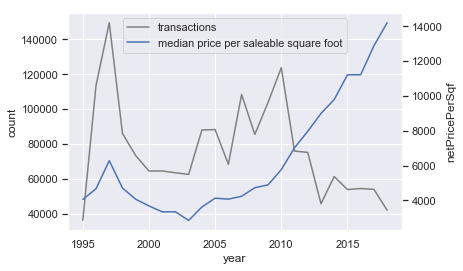

In [20]:
# Number of transactions per year
transactionsPerYear = plotdata.groupby(by="year").count().reset_index()
transactionsPerYear = transactionsPerYear[['year','netPricePerSqf']].rename(columns = {'netPricePerSqf':'count'})
transactionsPerYear

# Average netPricePerSqf per year
MedianNetPricePerSqfByYear = plotdata[['netPricePerSqf','year']].groupby(by="year").median()
MedianNetPricePerSqfByYear['netPricePerSqf'] = MedianNetPricePerSqfByYear['netPricePerSqf'].astype('int')
MedianNetPricePerSqfByYear = MedianNetPricePerSqfByYear.reset_index()

# line plot
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.grid(None)

sns.lineplot(x="year", y ="count", data=transactionsPerYear,color="grey", ax=ax)
sns.lineplot(x="year", y="netPricePerSqf",data=MedianNetPricePerSqfByYear, ax=ax2)

ax.legend(handles=[a.lines[0] for a in [ax,ax2]], 
           labels=["transactions", "median price per saleable square foot"],
         loc=9)

sns.set(rc={'figure.figsize':(8,5)})
plt.show()

## Number of transactions by district

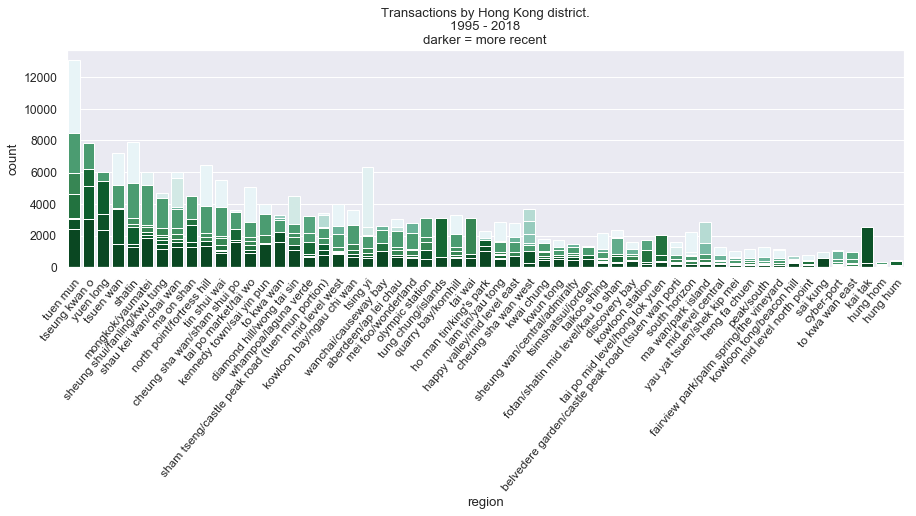

In [21]:
# Number of transaction by district
sns.set(style="darkgrid",font_scale=1.1,rc={'figure.figsize':(15,4)})

ax = sns.countplot(x='region', hue='year', data=data, order = data['region'].value_counts().index, palette="BuGn",dodge=False)
ax.set_title('Transactions by Hong Kong district.\n1995 - 2018\ndarker = more recent',verticalalignment='baseline')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=12, rotation_mode='anchor', ha='right')
ax.get_legend().remove()
ax

## Average netPricePerSqf per year per district

AxesSubplot(0.125,0.125;0.775x0.755)


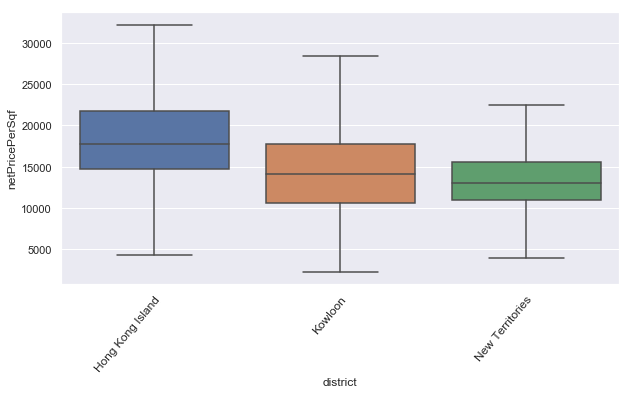

In [22]:
# Average netPricePerSqf per year per district
plotdata2018_sorted_median = plotdata[['district','netPricePerSqf','year']].groupby(by="district").median()
plotdata2018_sorted_median['netPricePerSqf'] = plotdata2018_sorted_median['netPricePerSqf'].astype('int')
plotdata2018_sorted_median = plotdata2018_sorted_median.sort_values('netPricePerSqf',ascending=False)

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.boxplot(x="district", y="netPricePerSqf",
#               color="b",
                 showfliers=False,
              order=plotdata2018_sorted_median['netPricePerSqf'].index,
                 data=plotdata[plotdata.year == 2018])
# ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=12, rotation_mode='anchor', ha='right')
print(ax)

## Visualizing the multidimensional relationships among the samples

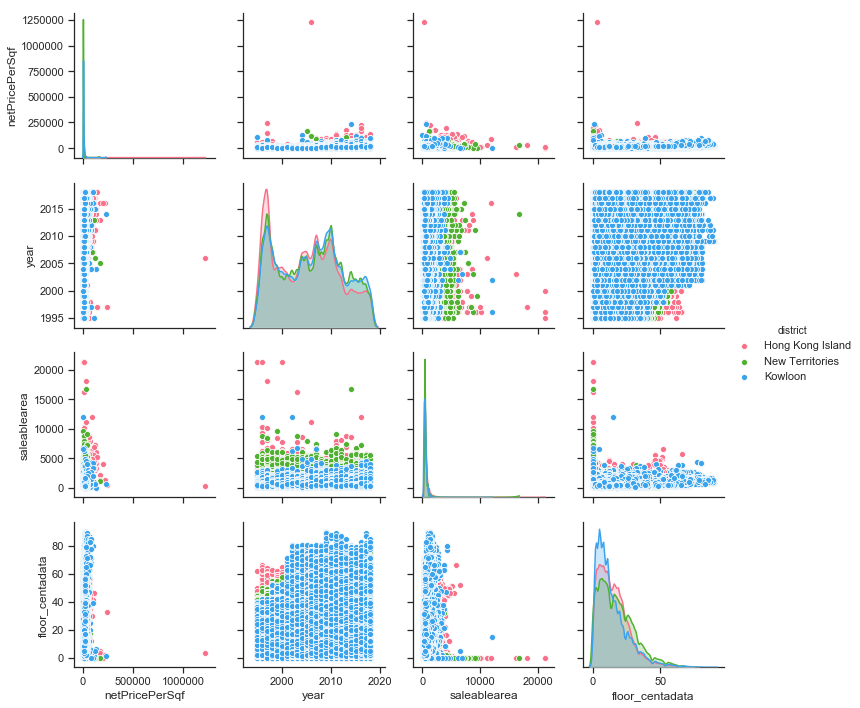

In [46]:
# Visualizing the multidimensional relationships among the samples
sns.set(style="ticks")
g = sns.pairplot(plotdata,
                 hue="district", palette="husl")
print(g)

## Pricing trend
### by district

In [24]:
plotdata_grouped = plotdata[['district','year','netPricePerSqf']]
plotdata_grouped[['year','netPricePerSqf']] = plotdata[['year','netPricePerSqf']].astype('int')
plotdata_grouped = plotdata_grouped.groupby(["year","district"])['netPricePerSqf'].median()
plotdata_grouped = plotdata_grouped.unstack()
plotdata_grouped.head()

district,Hong Kong Island,Kowloon,New Territories
year,,,
1995,5155.0,4294.5,3457.0
1996,5844.0,4560.0,4098.0
1997,7485.0,6057.0,5944.0
1998,5749.0,4629.0,4512.0
1999,4943.0,3875.0,3888.0


In [25]:
normalized = plotdata_grouped.div(plotdata_grouped.iloc[0]).mul(100)

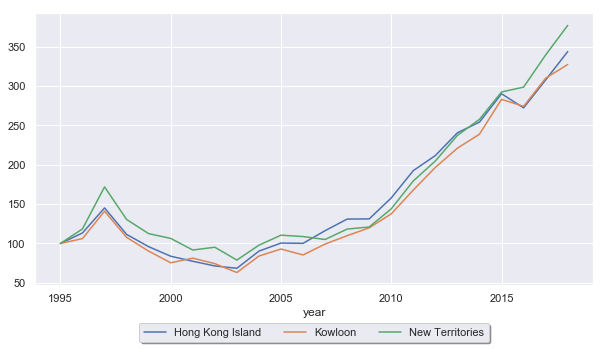

In [26]:
ax = normalized.plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),shadow=True, ncol=3)
ax

### by region

In [27]:
plotdata_grouped_region = plotdata[['region','year','netPricePerSqf']]
plotdata_grouped_region[['year','netPricePerSqf']] = plotdata_grouped_region[['year','netPricePerSqf']].astype('int')
plotdata_grouped_region = plotdata_grouped_region.groupby(["year","region"])['netPricePerSqf'].median()
plotdata_grouped_region = plotdata_grouped_region.unstack()
normalized_region = plotdata_grouped_region.div(plotdata_grouped_region.iloc[0]).mul(100)

In [28]:
normalized_region.tail()

region,aberdeen/ap lei chau,belvedere garden/castle peak road (tsuen wan porti,cheung sha wan west,cheung sha wan/sham shui po,cyber-port,diamond hill/wong tai sin,discovery bay,fairview park/palm spring/the vineyard,fotan/shatin mid level/kau to shan,happy valley/mid level east,...,tseung kwan o,tsimshatsui/jordan,tsing yi,tsuen wan,tuen mun,tung chung/islands,wanchai/causeway bay,whampoa/laguna verde,yau yat tsuen/shek kip mei,yuen long
year,,,,,,,,,,,,,,,,,,,,,
2014,474.372523,187.135058,NaN,265.958005,NaN,222.154800,194.821265,209.201481,213.054876,272.899354,...,219.987923,254.001894,280.131209,253.631429,282.312659,265.689433,391.736758,224.736695,200.406150,292.054603
2015,561.690885,224.412533,NaN,310.813648,NaN,286.569579,210.311641,236.541512,240.195736,298.753463,...,210.144928,344.008998,334.989066,270.276557,321.854823,347.293814,337.076608,308.957032,231.853786,341.547077
2016,540.598855,209.328270,NaN,274.068241,NaN,247.141316,207.687901,228.767848,209.524642,271.144968,...,242.491948,262.621359,312.402374,256.655467,313.343768,294.668170,306.274153,256.370584,228.822164,393.367168
2017,594.760018,248.967482,NaN,307.375328,NaN,278.505933,224.461503,259.756742,230.968193,289.188981,...,263.204509,283.376746,365.573258,368.984234,389.532381,335.405928,339.577177,287.743499,245.807949,404.375219
2018,656.560986,290.458106,NaN,343.228346,NaN,340.480043,244.065078,308.183501,258.580916,323.730379,...,304.549114,341.842292,426.741643,349.056604,439.326942,392.880155,389.952262,323.180166,268.653902,437.819391


In [29]:
prices_increase_by_region = normalized_region[normalized_region.index == normalized_region.index[-1]].unstack()
prices_increase_by_region = prices_increase_by_region.to_frame()
prices_increase_by_region = prices_increase_by_region.reset_index()
prices_increase_by_region = prices_increase_by_region.rename(columns={0:'netPricePerSqf'})
prices_increase_by_region.sort_values('netPricePerSqf',ascending=False).head(10)

,region,year,netPricePerSqf
0,aberdeen/ap lei chau,2018,656.560986
12,hung hom,2018,479.494382
11,ho man tin/king's park,2018,446.162928
51,tuen mun,2018,439.326942
56,yuen long,2018,437.819391
49,tsing yi,2018,426.741643
42,tai wai,2018,404.050014
18,kowloon tong/beacon hill,2018,401.582007
15,kennedy town/sai yin pun,2018,393.674957
52,tung chung/islands,2018,392.880155


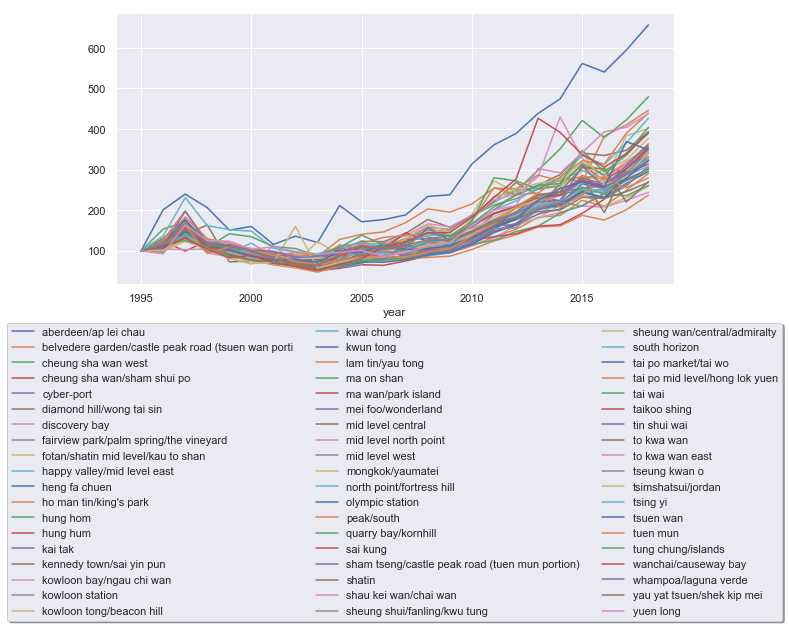

In [30]:
ax2 = normalized_region.plot()
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),shadow=True, ncol=3)
ax2

## Correlation matrix 

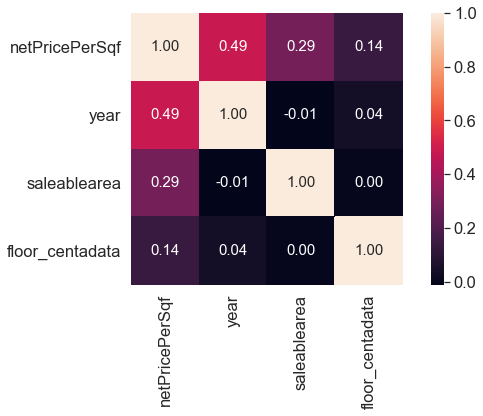

In [31]:
# Calculate and show correlation matrix
cols = plotdata.iloc[:,[0,1,2,3]].columns
cm = np.corrcoef(plotdata.iloc[:,[0,1,2,3]].values.T)

sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols
                )

# Making a prediction - Linear Regression

## Statsmodels

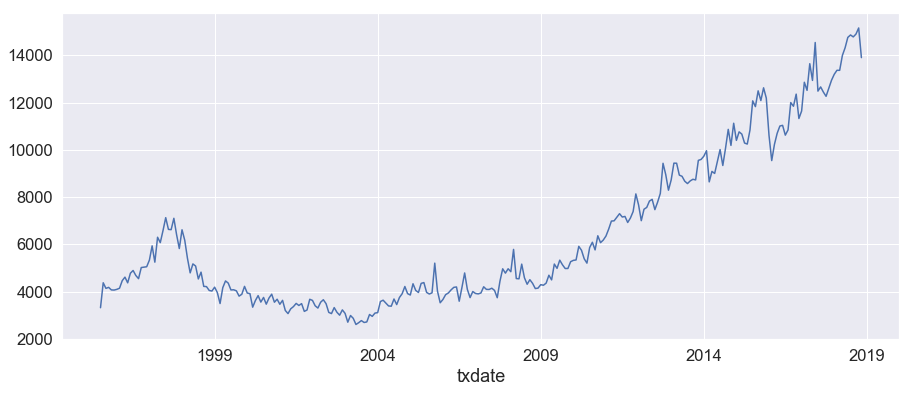

In [32]:
y.plot(figsize=(15, 6))
plt.show()

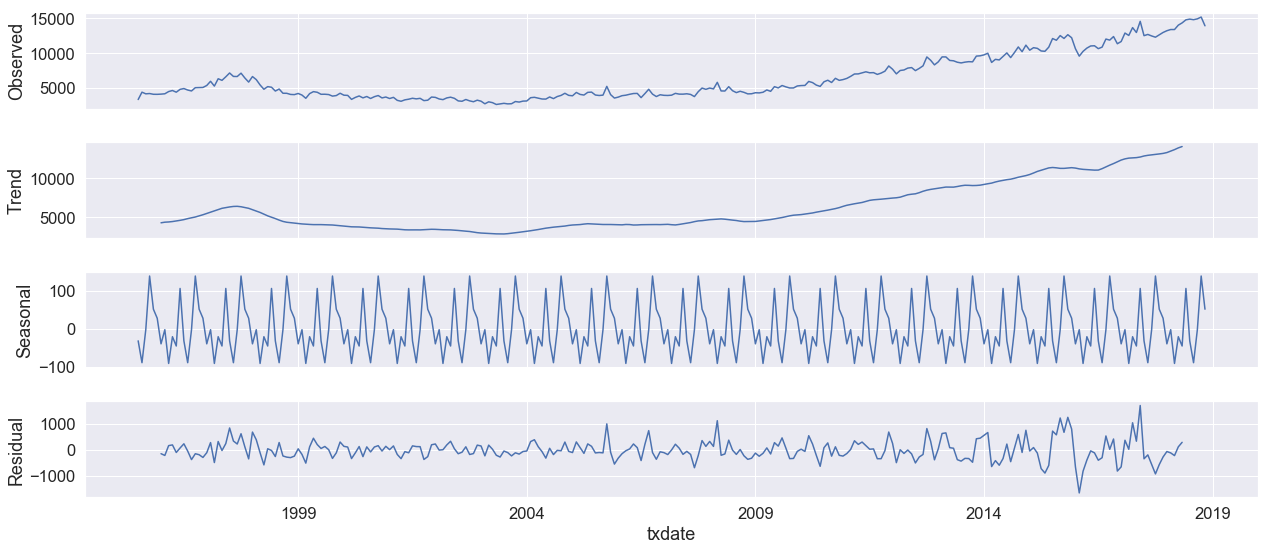

In [33]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [34]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5766.521867307366
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5355.948537123363
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4533.6246431970885
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4325.870686648651
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4492.241379397325
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4475.947897254702
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4344.478360193352
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4315.706875771095
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5547.332809673158
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4904.9860412415765
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4357.974335791345
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4157.29952946254
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4356.734326308762
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4314.459327408482
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4191.395134329263
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4152.378949897678
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4221.685329507138
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4051.6626414813377
ARIMA(0,

In [36]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3063      0.150      2.038      0.042       0.012       0.601
ma.L1         -0.5920      0.126     -4.688      0.000      -0.840      -0.344
ar.S.L12      -0.5276      0.043    -12.273      0.000      -0.612      -0.443
sigma2      3.111e+05    2.1e+04     14.804      0.000     2.7e+05    3.52e+05


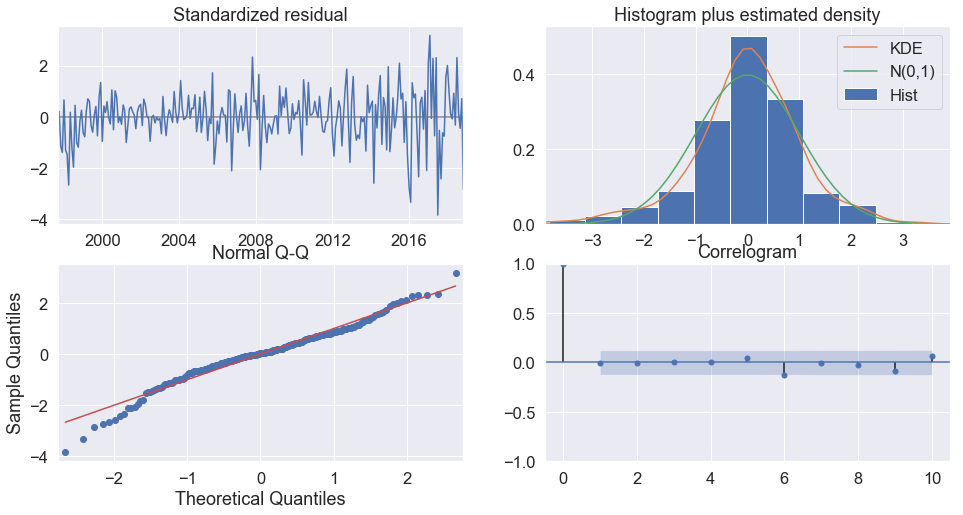

In [37]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

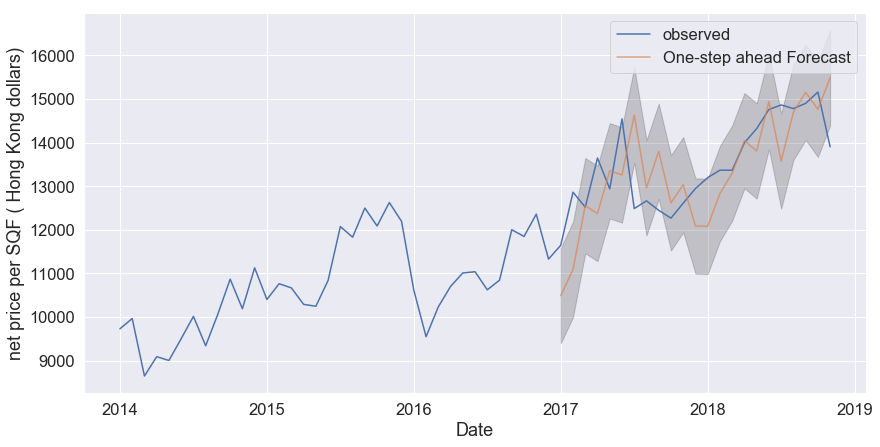

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('net price per SQF ( Hong Kong dollars)')
plt.legend()
plt.show()

## Sklearn

In [39]:
netPricePerSqf = plotdata['netPricePerSqf']
features = plotdata.iloc[:,[0,2,3]]

In [40]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [41]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, netPricePerSqf, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


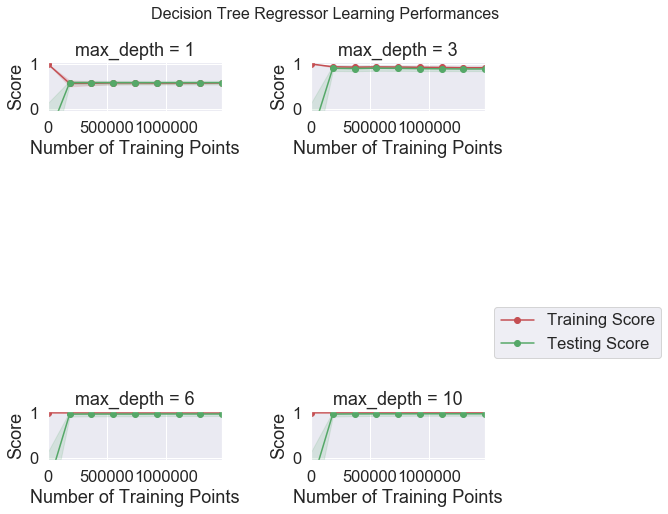

In [42]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, netPricePerSqf)

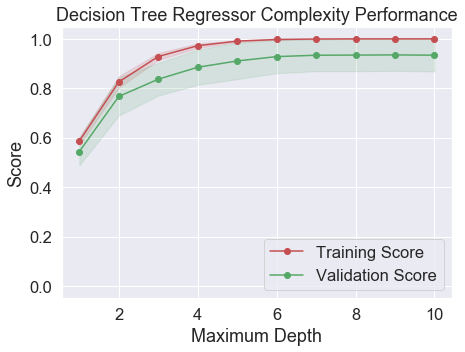

In [43]:
vs.ModelComplexity(X_train, y_train)

In [44]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [45]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.
